In [1]:
import pandas as pd

df = pd.read_csv(
    "/Users/margotiamanova/Desktop/DI-Bootcamp/Week6/Day5/Daily Challenge/globalterrorismdb_0718dist.csv",
    sep=',',
    encoding="latin-1",
    low_memory=False
)

print()

print(df.head())


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY

In [2]:
# information about columns
print(df.info())

# descriptive statistics for numeric data
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23

In [3]:
# Check for missing values
print(df.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [4]:
print(df.shape)

(181691, 135)


In [5]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


The dataset contains a large number of columns, some of which are not relevant or necessary for analysis.

In [6]:
df.rename(columns={
    'iyear': 'Incident_Year',
    'imonth': 'Incident_Month',
    'iday': 'Incident_Day',
    'country_txt': 'Country_Name',
    'region_txt': 'Region_Name',
    'attacktype1_txt': 'Type_of_Attack',
    'target1': 'Primary_Target',
    'nkill': 'Number_Killed',
    'nwound': 'Number_Wounded',
    'summary': 'Incident_Summary',
    'gname': 'Responsible_Group',
    'targtype1_txt': 'Type_of_Target',
    'weaptype1_txt': 'Type_of_Weapon',
    'motive': 'Attack_Motive'
}, inplace=True)

In [7]:
df.head()

,eventid,Incident_Year,Incident_Month,Incident_Day,approxdate,extended,resolution,country,Country_Name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df = df[['Incident_Year', 'Incident_Month', 'Incident_Day', 'Country_Name', 'Region_Name', 'city', 
         'latitude', 'longitude', 'Type_of_Attack', 'Number_Killed', 'Number_Wounded', 
         'Primary_Target', 'extended', 'Responsible_Group', 'Type_of_Target', 
         'Type_of_Weapon', 'Attack_Motive']]

In [9]:
df.head()

,Incident_Year,Incident_Month,Incident_Day,Country_Name,Region_Name,city,latitude,longitude,Type_of_Attack,Number_Killed,Number_Wounded,Primary_Target,extended,Responsible_Group,Type_of_Target,Type_of_Weapon,Attack_Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:


print(df.isnull().sum())
     
# Drop rows with missing values

Incident_Year             0
Incident_Month            0
Incident_Day              0
Country_Name              0
Region_Name               0
city                    435
latitude               4556
longitude              4557
Type_of_Attack            0
Number_Killed         10313
Number_Wounded        16311
Primary_Target          638
extended                  0
Responsible_Group         0
Type_of_Target            0
Type_of_Weapon            0
Attack_Motive        131130
dtype: int64


In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)  # Sort by highest percentage
print(missing_percentage)

Attack_Motive        72.171984
Number_Wounded        8.977330
Number_Killed         5.676120
longitude             2.508104
latitude              2.507554
Primary_Target        0.351146
city                  0.239417
Type_of_Weapon        0.000000
Type_of_Target        0.000000
Responsible_Group     0.000000
extended              0.000000
Incident_Year         0.000000
Incident_Month        0.000000
Region_Name           0.000000
Country_Name          0.000000
Incident_Day          0.000000
Type_of_Attack        0.000000
dtype: float64


The majority of the values in the 'Motive' column are missing, so we choose to remove this column from the dataset.

For the remaining variables, we fill the missing values using the mode or the median, depending on the type of data.

In [ ]:
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['Type_of_Attack'] = df['Type_of_Attack'].fillna(df['Type_of_Attack'].mode()[0])
df['Primary_Target'] = df['Primary_Target'].fillna(df['Primary_Target'].mode()[0])
df = df.drop(columns=['Attack_Motive'])

check status of missing 

In [16]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)  # Sort by highest percentage
print(missing_percentage)

Number_Wounded       8.977330
Number_Killed        5.676120
longitude            2.508104
latitude             2.507554
Incident_Year        0.000000
Incident_Month       0.000000
Incident_Day         0.000000
Country_Name         0.000000
Region_Name          0.000000
city                 0.000000
Type_of_Attack       0.000000
Primary_Target       0.000000
extended             0.000000
Responsible_Group    0.000000
Type_of_Target       0.000000
Type_of_Weapon       0.000000
dtype: float64


In [ ]:
df['Number_Wounded'] = df['Number_Wounded'].fillna(df['Number_Wounded'].median()[0])
df['Number_Killed'] = df['Number_Killed'].fillna(df['Number_Killed'].median()[0])
df['longitude'] = df['longitude'].fillna(df['longitude'].mode()[0])  # Corrected to use longitude
df['latitude'] = df['latitude'].fillna(df['latitude'].mode()[0])

In [19]:
print(df.isnull().sum())

Incident_Year        0
Incident_Month       0
Incident_Day         0
Country_Name         0
Region_Name          0
city                 0
latitude             0
longitude            0
Type_of_Attack       0
Number_Killed        0
Number_Wounded       0
Primary_Target       0
extended             0
Responsible_Group    0
Type_of_Target       0
Type_of_Weapon       0
dtype: int64


In [20]:
df.describe()

,Incident_Year,Incident_Month,Incident_Day,latitude,longitude,Number_Killed,Number_Wounded,extended
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.744214,-4.460782e+02,2.266860,2.883296,0.045346
std,13.259430,3.388303,8.814045,18.398930,2.021946e+05,11.227057,34.309747,0.208063
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.849620,6.655000e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.633078,4.364658e+01,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.538561,6.835734e+01,2.000000,2.000000,0.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000


## Visualization

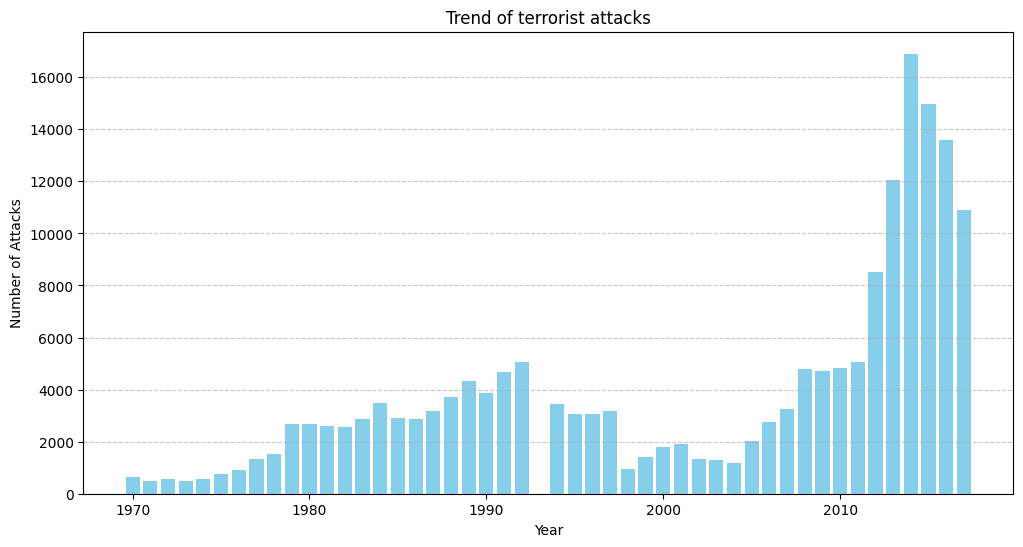

In [22]:
import matplotlib.pyplot as plt

# Number of attacks per year
df_yearly = df.groupby('Incident_Year').size()

plt.figure(figsize=(12, 6))
plt.bar(df_yearly.index, df_yearly.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Trend of terrorist attacks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/hz/4wr_d_nj47d_tw5jgy2y69lc0000gn/T/ipykernel_2869/3366682780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Incident_Month'], palette='magma', order=range(1, 13))  # Ensure months are in order


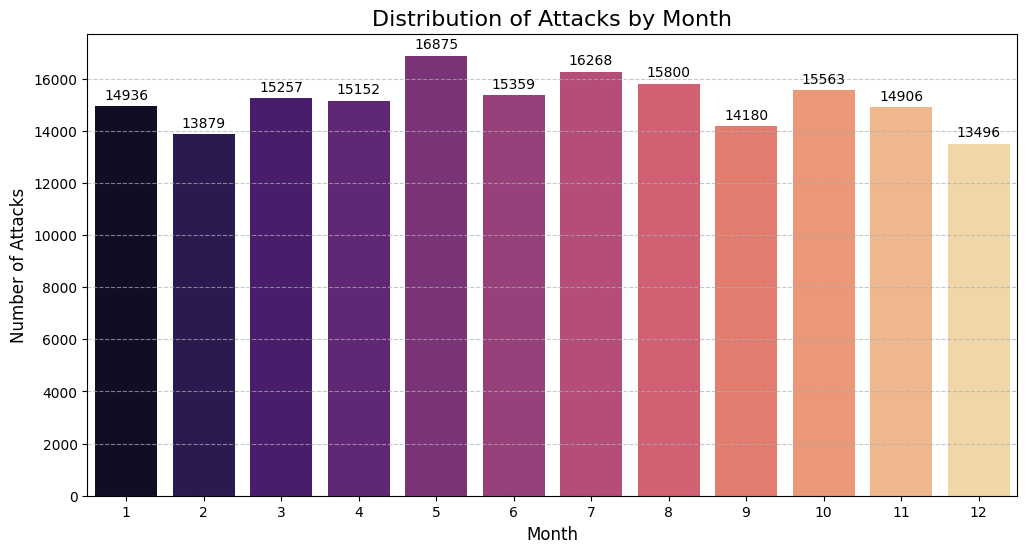

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of attacks by month
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Incident_Month'], palette='magma', order=range(1, 13))  # Ensure months are in order
plt.title("Distribution of Attacks by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Attacks", fontsize=12)

# Add annotations for each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/hz/4wr_d_nj47d_tw5jgy2y69lc0000gn/T/ipykernel_2869/2698888420.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_data['Region_Name'], x=region_data['Number_of_Attacks'], palette='viridis')


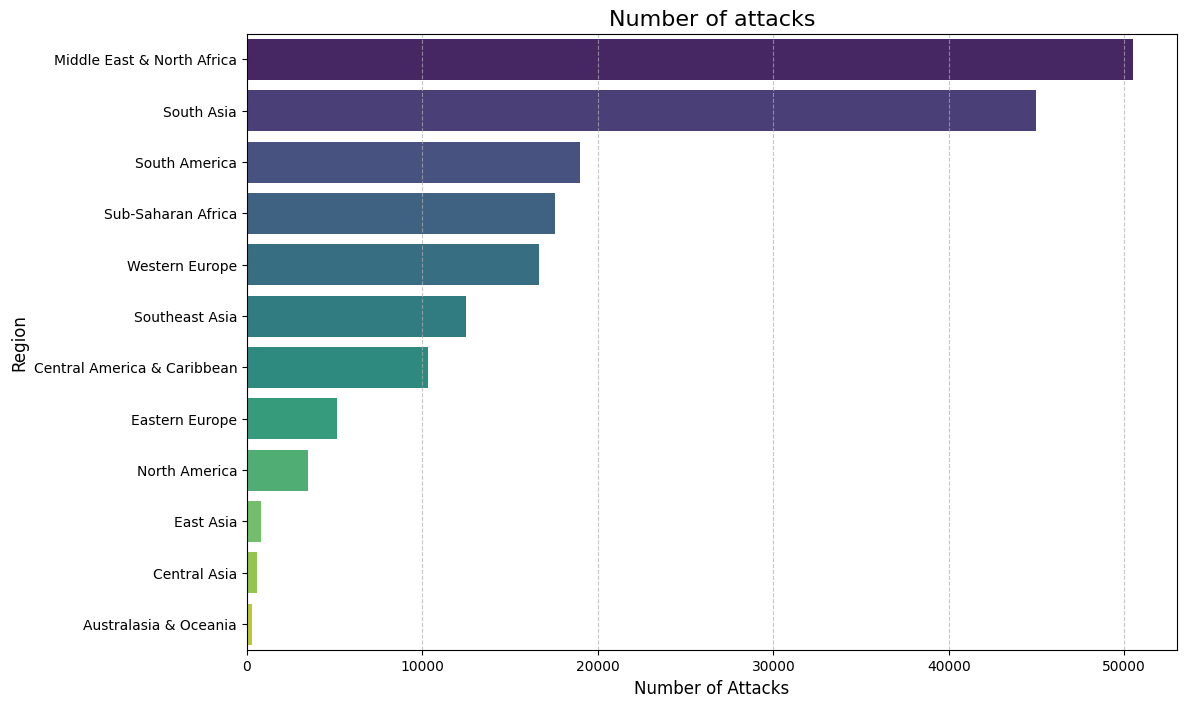

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# group by region
region_data = df.groupby('Region_Name').size().reset_index(name='Number_of_Attacks')

# sorting the data
region_data = region_data.sort_values(by='Number_of_Attacks', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(y=region_data['Region_Name'], x=region_data['Number_of_Attacks'], palette='viridis')
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title('Number of attacks', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/var/folders/hz/4wr_d_nj47d_tw5jgy2y69lc0000gn/T/ipykernel_2869/483953652.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=attack_type_data['Type_of_Attack'], x=attack_type_data['Number_of_Attacks'], palette='Blues_r')


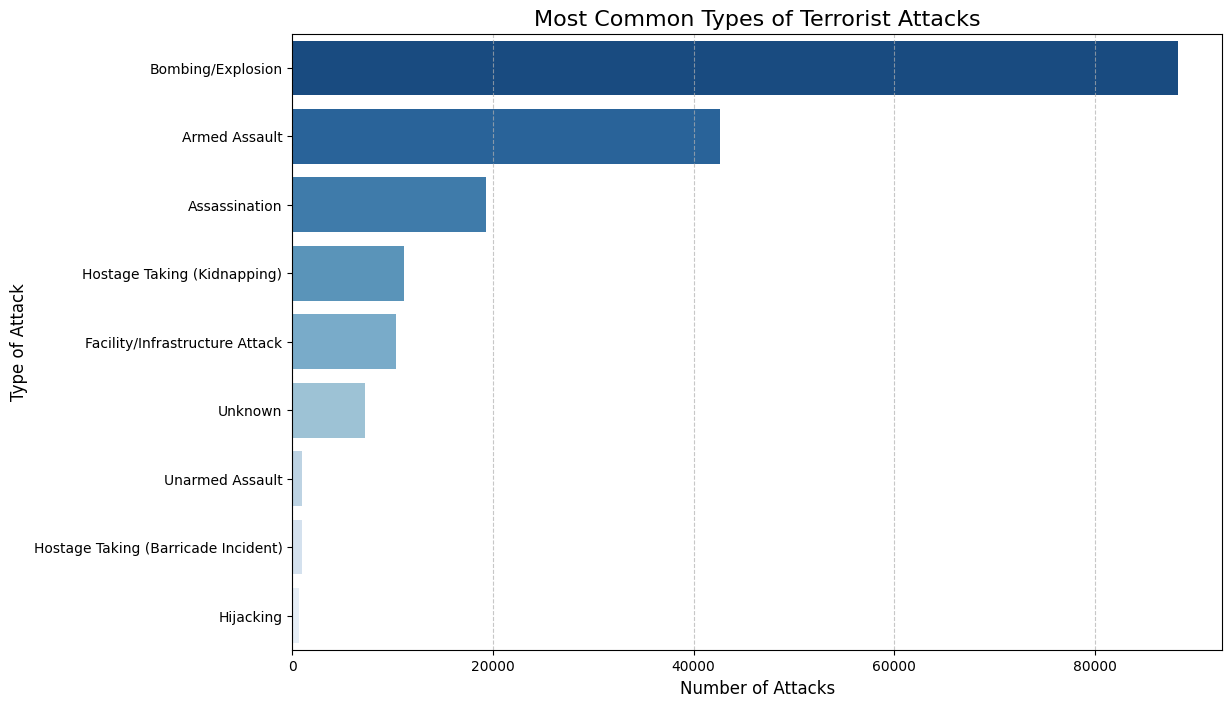

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by attack type
attack_type_data = df.groupby('Type_of_Attack').size().reset_index(name='Number_of_Attacks')

# Sorting the data
attack_type_data = attack_type_data.sort_values(by='Number_of_Attacks', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(y=attack_type_data['Type_of_Attack'], x=attack_type_data['Number_of_Attacks'], palette='Blues_r')
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Type of Attack', fontsize=12)
plt.title('Most Common Types of Terrorist Attacks', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

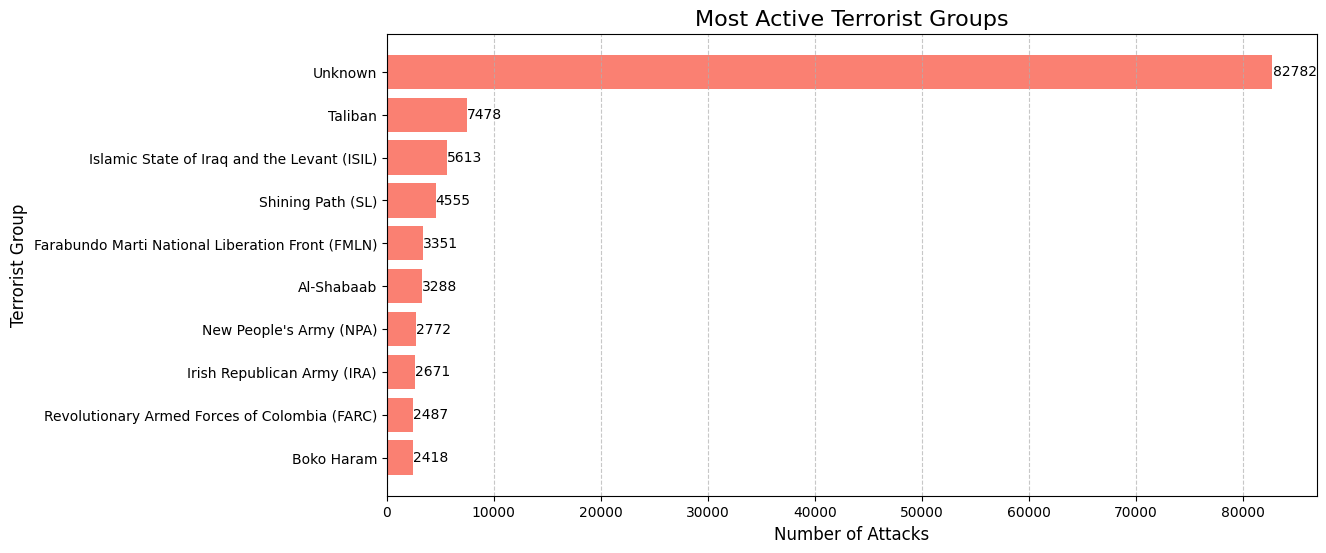

In [34]:
import matplotlib.pyplot as plt

# Get the top 10 terrorist groups
top_groups = df['Responsible_Group'].value_counts().head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
bars = plt.barh(top_groups.index, top_groups.values, color='salmon')
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Terrorist Group', fontsize=12)
plt.title('Most Active Terrorist Groups', fontsize=16)

# Adding annotations to the bars
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/var/folders/hz/4wr_d_nj47d_tw5jgy2y69lc0000gn/T/ipykernel_2869/1975731334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Region_Name'], y=df['Number_Killed'], palette='muted', scale='width', inner='quartile')
/var/folders/hz/4wr_d_nj47d_tw5jgy2y69lc0000gn/T/ipykernel_2869/1975731334.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=df['Region_Name'], y=df['Number_Killed'], palette='muted', scale='width', inner='quartile')


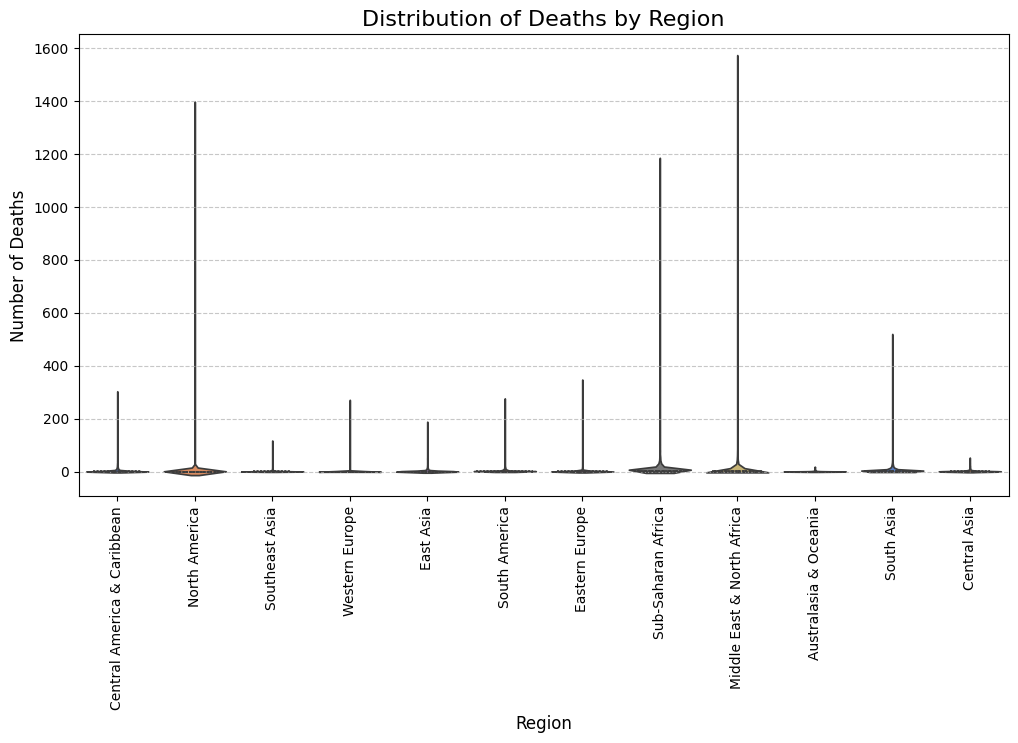

In [35]:
# Plotting the data
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Region_Name'], y=df['Number_Killed'], palette='muted', scale='width', inner='quartile')
plt.xticks(rotation=90)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Distribution of Deaths by Region', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
     


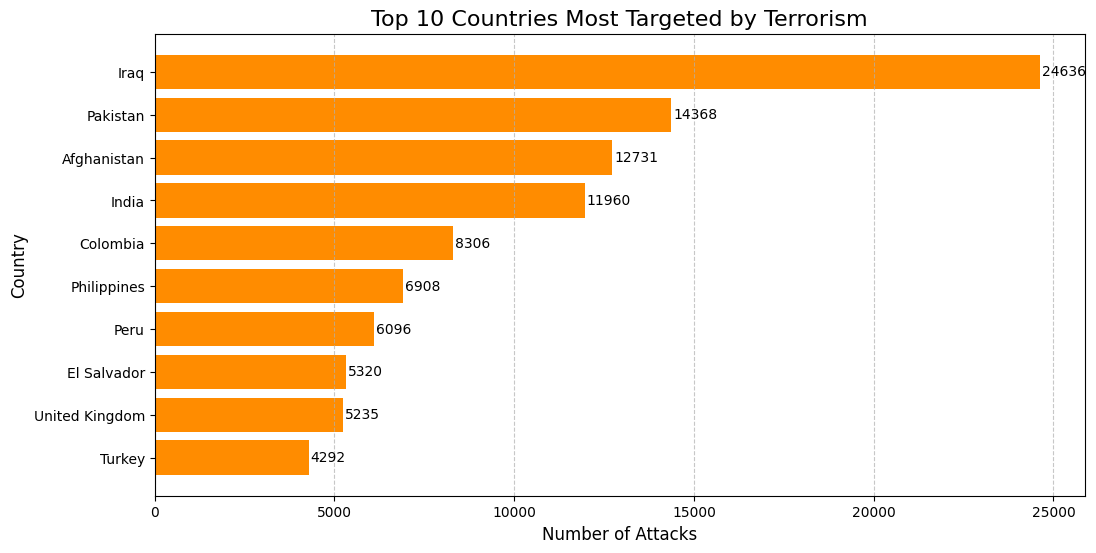

In [38]:
import matplotlib.pyplot as plt

# Get the top 10 countries by number of attacks
top_countries = df['Country_Name'].value_counts().head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
bars = plt.barh(top_countries.index, top_countries.values, color='darkorange')
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Countries Most Targeted by Terrorism', fontsize=16)

# Adding annotations to the bars
for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#

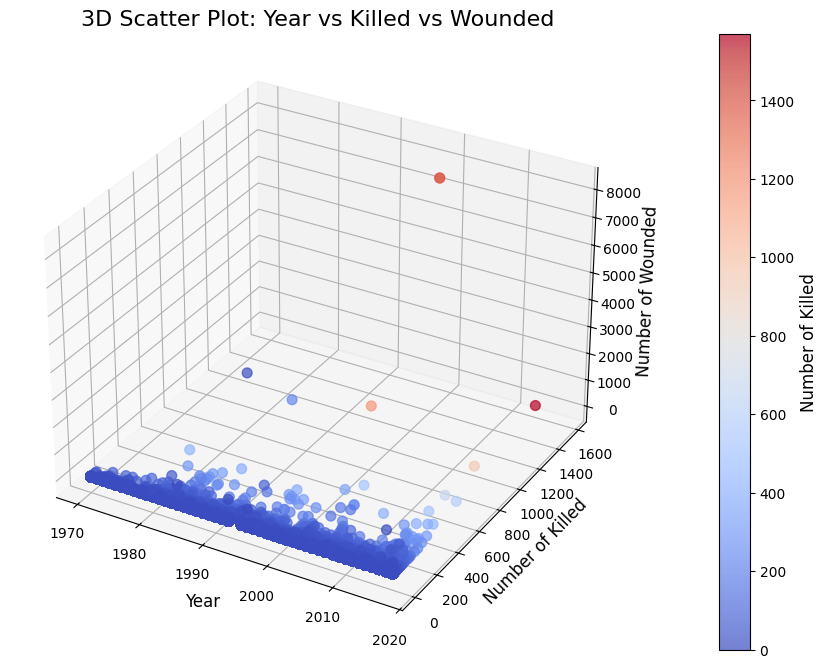

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'Incident_Year', 'Number_Killed', and 'Number_Wounded'
scatter = ax.scatter(df['Incident_Year'], df['Number_Killed'], df['Number_Wounded'], 
                     c=df['Number_Killed'], cmap='coolwarm', s=50, alpha=0.7)

# Adding labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Killed', fontsize=12)
ax.set_zlabel('Number of Wounded', fontsize=12)
ax.set_title('3D Scatter Plot: Year vs Killed vs Wounded', fontsize=16)

# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Number of Killed', fontsize=12)

plt.show()

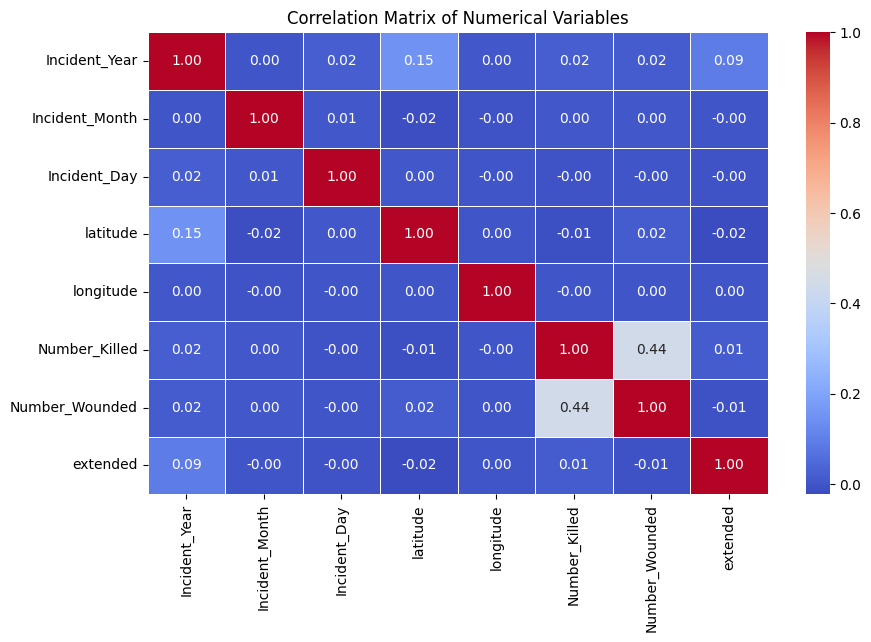

In [44]:

# Correlation matrix with all numerical variables
numeric_vars = ['Incident_Year', 'Incident_Month', 'Incident_Day', 'latitude', 'longitude', 
                'Number_Killed', 'Number_Wounded', 'extended']
df_numeric = df[numeric_vars]

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Display the matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix of Numerical Variables")
plt.show()
     


Variables with correlation values close to +1 indicate a strong positive relationship.  Number_Killed and Number_Wounded have a high positive correlation, it suggests that incidents with more fatalities also tend to have more injuries

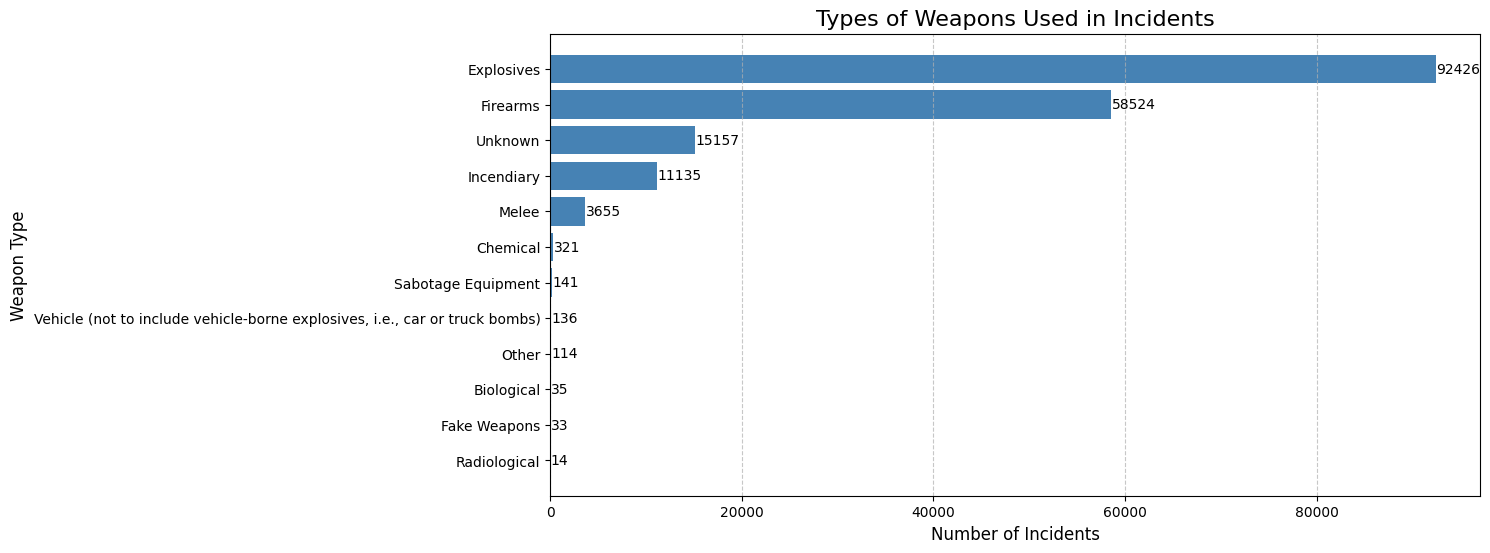

In [45]:
import matplotlib.pyplot as plt

# Count the occurrences of each weapon type
weapon_counts = df['Type_of_Weapon'].value_counts()

# Plotting the data
plt.figure(figsize=(12, 6))
bars = plt.barh(weapon_counts.index, weapon_counts.values, color='steelblue')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Weapon Type', fontsize=12)
plt.title('Types of Weapons Used in Incidents', fontsize=16)

# Adding annotations to the bars
for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis to show the most common weapon type at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

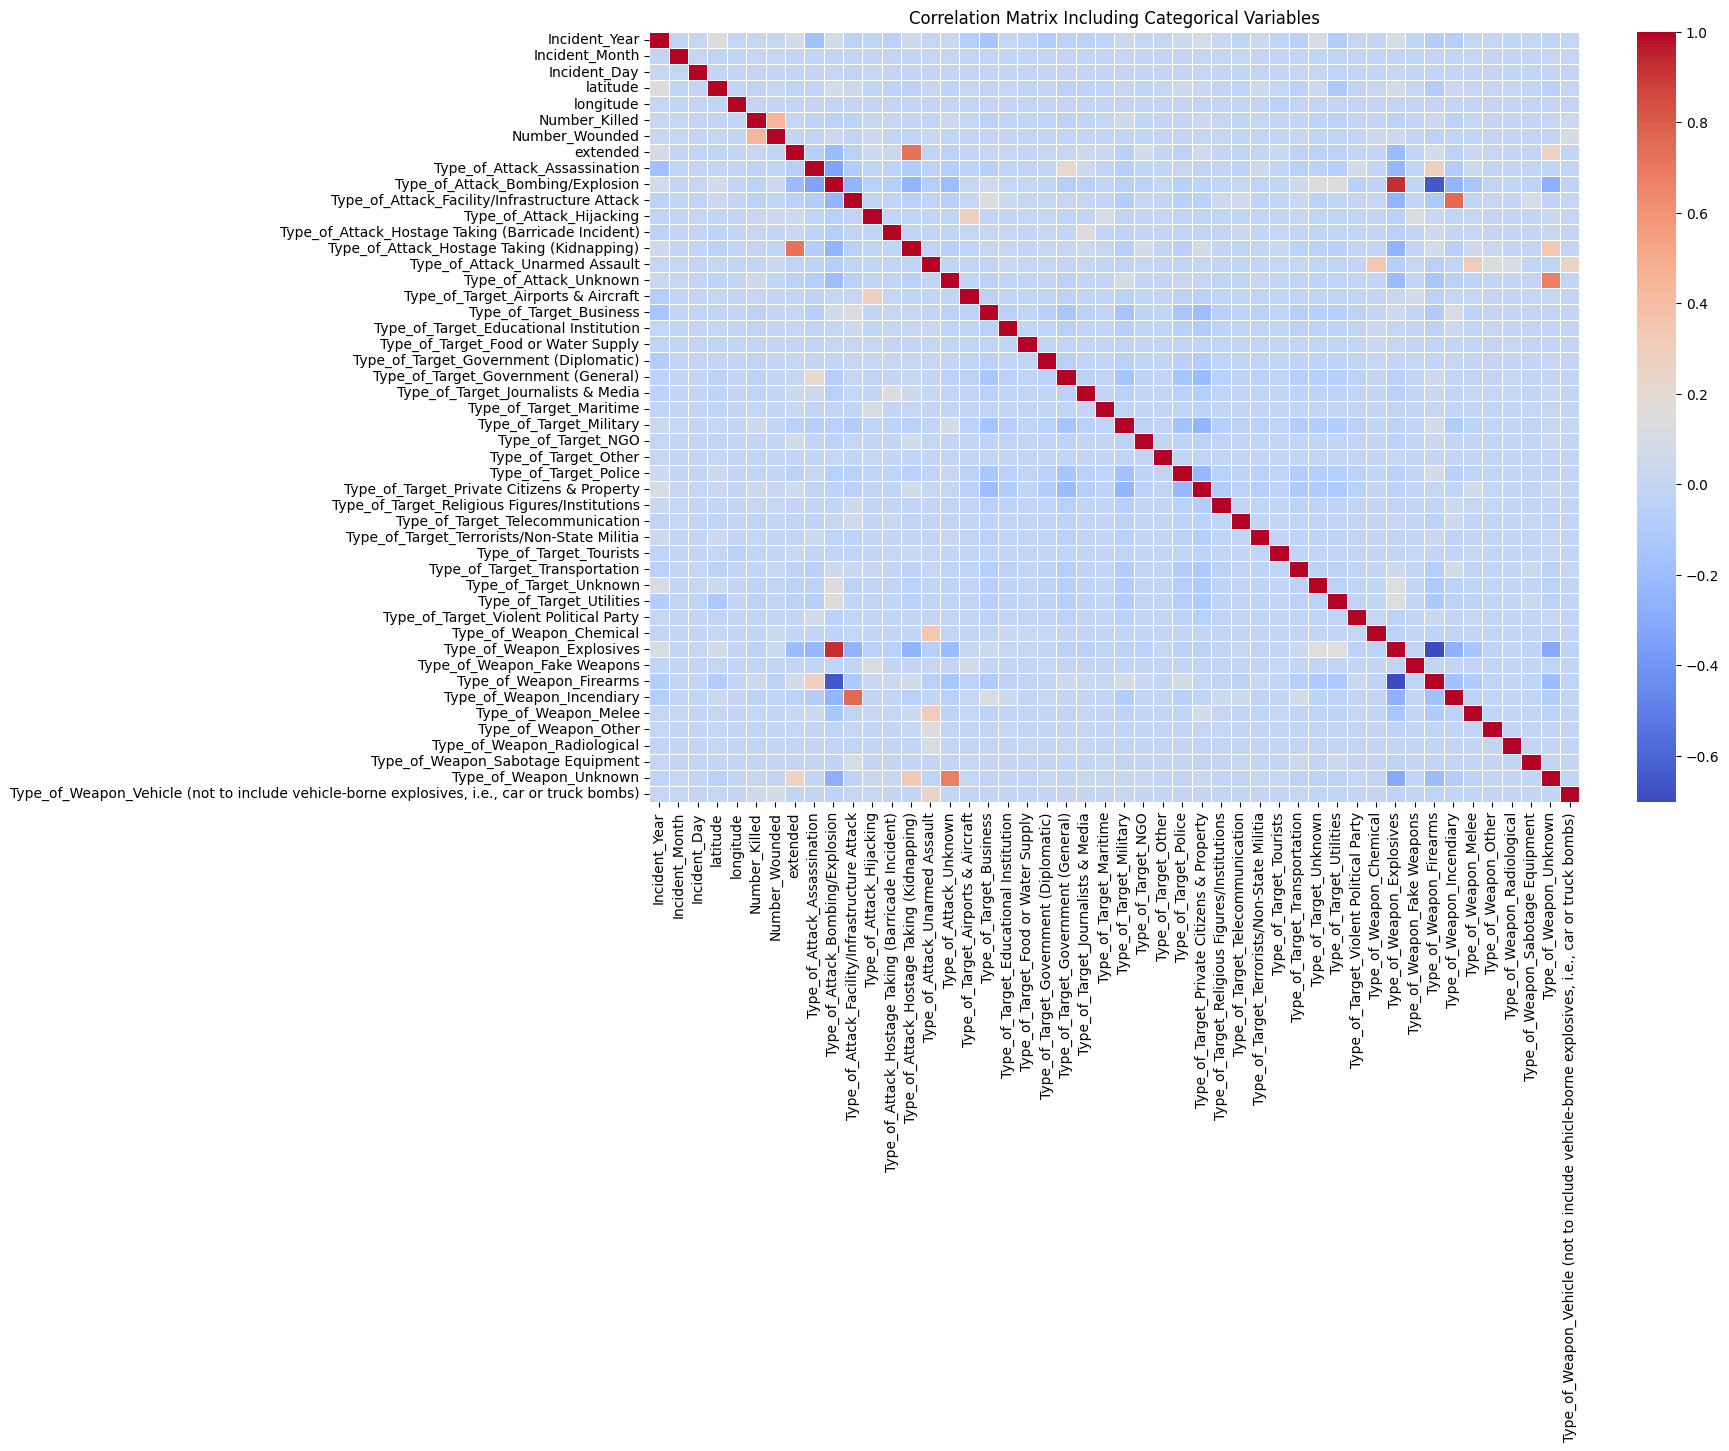

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical and numeric variables
categorical_vars = ['Type_of_Attack', 'Type_of_Target', 'Type_of_Weapon']
numeric_vars = ['Incident_Year', 'Incident_Month', 'Incident_Day', 'latitude', 'longitude', 
                'Number_Killed', 'Number_Wounded', 'extended']

# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)

# Concatenate numeric and encoded variables
df_final = pd.concat([df[numeric_vars], df_encoded], axis=1)

# Calculate the correlation matrix
corr_matrix = df_final.corr()

# Show heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix Including Categorical Variables")
plt.show()

Most Affected Regions and Countries:

The Middle East and South Asia are the most affected regions, with Iraq and Afghanistan being the most targeted countries.
Common Attack and Weapon Types:

Bombings and armed assaults are the most common attack types, with explosives being the primary weapon used.
Casualty Patterns:

Incidents with higher fatalities also tend to have a higher number of injuries, indicating the severity of certain attacks.